In [36]:
#Step 1 데이터 준비

import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\User\Documents\Project1\data\IMDB top 1000.csv")

df = df.dropna(subset=["Title", "Genre", "Rate"])

def clean_title(t): 
    t = str(t).strip()
    i = 0

    while i < len(t) and t[i].isdigit():
        i += 1
    if i > 0 and i < len(t) and t[i] == ".":
        i += 1
    return t[i:].strip()

df["Title"] = df["Title"].apply(clean_title)

df["Rate"] = df["Rate"].astype(float)

df["Released_Year"] = df["Title"].str.extract(r"\((\d{4})\)") 
df["Released_Year"] = df["Released_Year"].astype(int)

df = df[["Title", "Genre", "Rate", "Released_Year"]]
df = df.drop_duplicates()
data_array = df.to_numpy()

print("Final shape", data_array.shape)
print(data_array[:20])

Final shape (398, 4)
[['The Shawshank Redemption (1994)' 'Drama' 9.3 1994]
 ['The Godfather (1972)' 'Crime, Drama' 9.2 1972]
 ['The Dark Knight (2008)' 'Action, Crime, Drama' 9.0 2008]
 ['The Godfather: Part II (1974)' 'Crime, Drama' 9.0 1974]
 ['The Lord of the Rings: The Return of the King (2003)'
  'Action, Adventure, Drama' 8.9 2003]
 ['Pulp Fiction (1994)' 'Crime, Drama' 8.9 1994]
 ["Schindler's List (1993)" 'Biography, Drama, History' 8.9 1993]
 ['12 Angry Men (1957)' 'Crime, Drama' 8.9 1957]
 ['Inception (2010)' 'Action, Adventure, Sci-Fi' 8.8 2010]
 ['Fight Club (1999)' 'Drama' 8.8 1999]
 ['The Lord of the Rings: The Fellowship of the Ring (2001)'
  'Action, Adventure, Drama' 8.8 2001]
 ['Forrest Gump (1994)' 'Drama, Romance' 8.8 1994]
 ['The Good, the Bad and the Ugly (1966)' 'Western' 8.8 1966]
 ['Hamilton (2020)' 'Biography, Drama, History' 8.7 2020]
 ['The Lord of the Rings: The Two Towers (2002)'
  'Action, Adventure, Drama' 8.7 2002]
 ['The Matrix (1999)' 'Action, Sci-Fi'

In [37]:
#Step 2 기본적인 데이터 탐색 (numpy)

df = df.drop_duplicates()
data_array = df.to_numpy()

rates = data_array[:, 2].astype(float)

print("총 영화 개수:", data_array.shape[0])

print("평균 평점:", round(np.mean(rates),1))
print("최고 평점:", np.max(rates))
print("최저 평점:", np.min(rates))

총 영화 개수: 398
평균 평점: 8.2
최고 평점: 9.3
최저 평점: 8.0


In [38]:
#Step 2 기본적인 데이터 탐색 (pandas)

df = df.drop_duplicates()

print("전체 영화 개수", len(df))

avg_rate = round(df["Rate"].astype(float).mean(),1)
max_rate = df["Rate"].astype(float).max()
min_rate = df["Rate"].astype(float).min()

print("평균 평점:", avg_rate)
print("최고 평점:", max_rate)
print("최저 평점:", min_rate)                  

전체 영화 개수 398
평균 평점: 8.2
최고 평점: 9.3
최저 평점: 8.0


In [30]:
#Step 3 평점이 높은 영화 찾기 (numpy)

df = df.drop_duplicates()

rates = data_array[:,2].astype(float)
max_rate = np.max(rates)

best_movies = data_array[rates == max_rate]

for row in best_movies:
    title = row[0]
    
print("최고 평점 영화 목록:")           
print(f"{title} - 평점: {max_rate:.1f}")

최고 평점 영화 목록:
The Shawshank Redemption (1994) - 평점: 9.3


In [39]:
#Step 3 평점이 높은 영화 찾기 (pandas)

df = df.drop_duplicates()

max_rate = df["Rate"].astype(float).max()

best_movies = df.loc[df["Rate"].astype(float) == max_rate, "Title"]

print("최고 평점 영화 목록:")
print(f"{title} - 평점: {max_rate:.1f}")

최고 평점 영화 목록:
The Shawshank Redemption (1994) - 평점: 9.3


In [42]:
#Step 4 특정 장르별 평균 평점 분석

rows = []
for i in range(len(df)): 
    title = df["Title"].iloc[i]
    genres = df["Genre"].iloc[i].split(",")
    rate = df["Rate"].iloc[i]

    for g in genres: 
        rows.append([title, g.strip(), rate])
        
df_expanded = pd.DataFrame(rows, columns=["Title", "Genre", "Rate"])

genre_avg = df_expanded.groupby("Genre")["Rate"].mean()

genre_avg_sorted = genre_avg.sort_values(ascending=False)

print("장르별 평균 평점")
for genre, rate in genre_avg_sorted.items():
    print(f"{genre}: {rate:.1f}")

장르별 평균 평점
Western: 8.4
Horror: 8.3
Family: 8.3
War: 8.3
Sci-Fi: 8.3
Crime: 8.2
Fantasy: 8.2
Action: 8.2
Adventure: 8.2
Mystery: 8.2
Drama: 8.2
Film-Noir: 8.2
History: 8.2
Musical: 8.2
Thriller: 8.2
Biography: 8.2
Sport: 8.2
Animation: 8.2
Music: 8.2
Comedy: 8.2
Romance: 8.2


In [41]:
#Step 5 연도별 평점 변화 분석
     
year_avg = df.groupby("Released_Year")["Rate"].mean()
year_avg_sorted = year_avg.sort_index()

print("연도별 평균 평점")

for year, rate in year_avg_sorted.items():
    print(f"{year}: {rate:.1f}")

print(df["Released_Year"].dtype)


연도별 평균 평점
1920: 8.1
1921: 8.3
1924: 8.2
1925: 8.2
1926: 8.1
1927: 8.1
1928: 8.1
1931: 8.4
1934: 8.1
1936: 8.5
1937: 8.1
1939: 8.1
1940: 8.1
1941: 8.3
1942: 8.3
1944: 8.3
1946: 8.6
1948: 8.1
1949: 8.1
1950: 8.3
1951: 8.1
1952: 8.3
1953: 8.1
1954: 8.2
1955: 8.2
1957: 8.2
1958: 8.2
1959: 8.2
1960: 8.2
1961: 8.2
1962: 8.2
1963: 8.3
1964: 8.4
1965: 8.3
1966: 8.3
1967: 8.1
1968: 8.4
1971: 8.4
1972: 8.5
1973: 8.2
1974: 8.6
1975: 8.3
1976: 8.2
1977: 8.6
1978: 8.1
1979: 8.3
1980: 8.3
1981: 8.4
1982: 8.1
1983: 8.3
1984: 8.2
1985: 8.3
1986: 8.2
1987: 8.2
1988: 8.3
1989: 8.1
1990: 8.7
1991: 8.1
1992: 8.0
1993: 8.0
1994: 8.6
1995: 8.1
1996: 8.0
1997: 8.1
1998: 8.1
1999: 8.1
2000: 8.1
2001: 8.1
2002: 8.2
2003: 8.0
2004: 8.0
2005: 8.1
2006: 8.1
2007: 8.0
2008: 8.1
2009: 8.0
2010: 8.1
2011: 8.1
2012: 8.1
2013: 8.0
2014: 8.1
2015: 8.0
2016: 8.0
2017: 8.1
2018: 8.1
2019: 8.1
2020: 8.7
int64


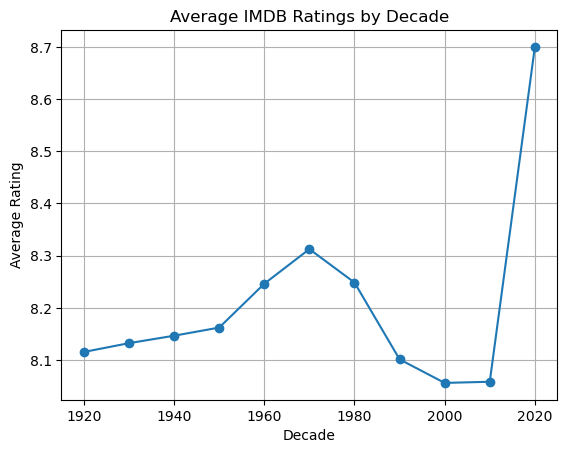

In [42]:
#Step 6 결과 시각화 

import matplotlib.pyplot as plt

df["Released_Year"] = df["Released_Year"].astype(int)
df["Decade"] = df["Released_Year"] // 10 * 10
decade_avg = df.groupby("Decade")["Rate"].mean()

decade_avg.plot(kind="line", marker="o")
plt.title("Average IMDB Ratings by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()



Decade
1920    102
1930     72
1940    125
1950    151
1960     59
1970     55
1980     75
1990    387
2000    743
2010    736
2020      3
Name: count, dtype: int64


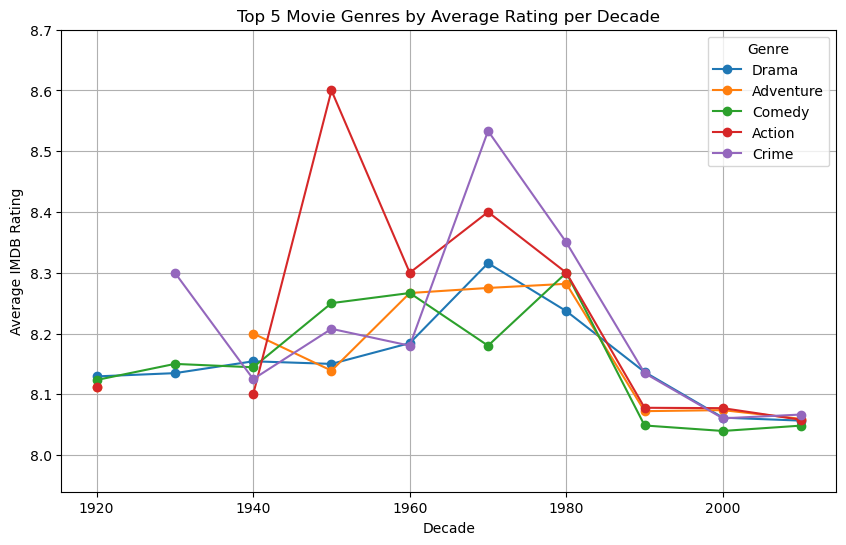

In [75]:
#확장 프로젝트 (1): 시기별(10년 단위) 장르별 평점 변화 분석

import pandas as pd
import matplotlib.pyplot as plt

df["Genre"] = df["Genre"].str.split(",")
df = df.explode("Genre")
df["Genre"] = df["Genre"].str.strip()

df["Decade"] = df["Released_Year"].astype(int) // 10 * 10

decade_counts = df["Decade"].value_counts().sort_index()
print(decade_counts)

valid_decades = decade_counts[decade_counts >= 20].index
df_filtered = df[df["Decade"].isin(valid_decades)]

genre_rate = df_filtered.groupby(["Decade", "Genre"])["Rate"].mean().reset_index()
pivot_rate = genre_rate.pivot(index="Decade", columns="Genre", values="Rate")

top_genres = df_filtered["Genre"].value_counts().head(5).index
pivot_rate_top = pivot_rate[top_genres]

pivot_rate_top.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Top 5 Movie Genres by Average Rating per Decade")
plt.ylabel("Average IMDB Rating")
plt.xlabel("Decade")

y_min = pivot_rate_top.min().min()
y_max = pivot_rate_top.max().max()
plt.ylim(y_min - 0.1, y_max + 0.1)

plt.grid(True)
plt.show()

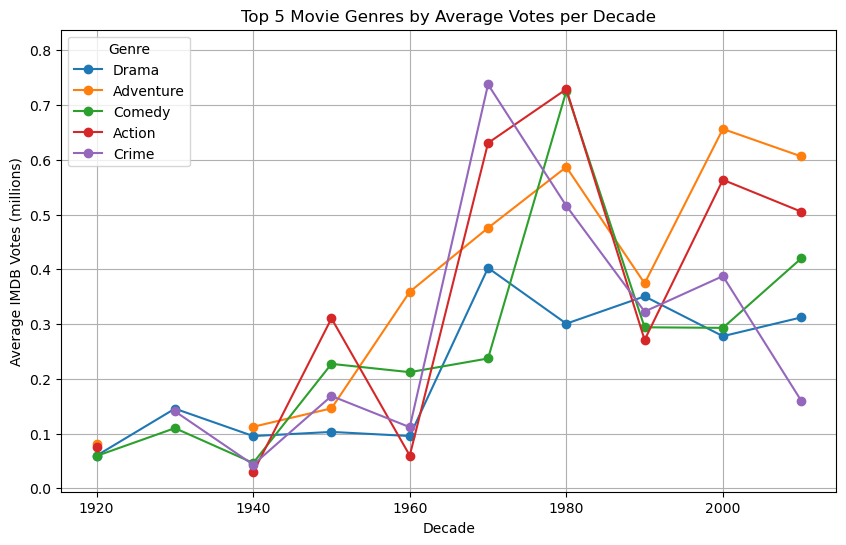

In [43]:
#확장 프로젝트 (2): 시기별(10년 단위) 장르별 관객수 분석

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\User\Documents\Project1\data\IMDB top 1000.csv")
df = df.dropna(subset=["Title", "Genre", "Rate"])
df["Rate"] = df["Rate"].astype(float)

df["Released_Year"] = df["Title"].str.extract(r"\((\d{4})\)").astype(int) 

df["Info"] = df["Info"].fillna("Votes:0|Gross:$0M")

df["Votes"] = df["Info"].str.split("|").str[0] 
df["Votes"] = df["Votes"].str.replace("Votes:", "").str.replace(",", "").str.strip().astype(float)

df["Genre"] = df["Genre"].str.split(",")
df = df.explode("Genre")
df["Genre"] = df["Genre"].str.strip()

df["Decade"] = df["Released_Year"] // 10 * 10

valid_decades = df["Decade"].value_counts().loc[lambda x: x >= 20].index
df_filtered = df[df["Decade"].isin(valid_decades)]

genre_votes = df_filtered.groupby(["Decade", "Genre"])["Votes"].mean().reset_index()
pivot_votes = genre_votes.pivot(index="Decade", columns="Genre", values="Votes")

top_genres = df_filtered["Genre"].value_counts().head(5).index

pivot_votes_top = pivot_votes[top_genres] / 1_000_000

pivot_votes_top.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Top 5 Movie Genres by Average Votes per Decade")
plt.ylabel("Average IMDB Votes (millions)")
plt.xlabel("Decade")
plt.ylim(None, pivot_votes_top.max().max() + 0.1)

plt.grid(True)

plt.show()      


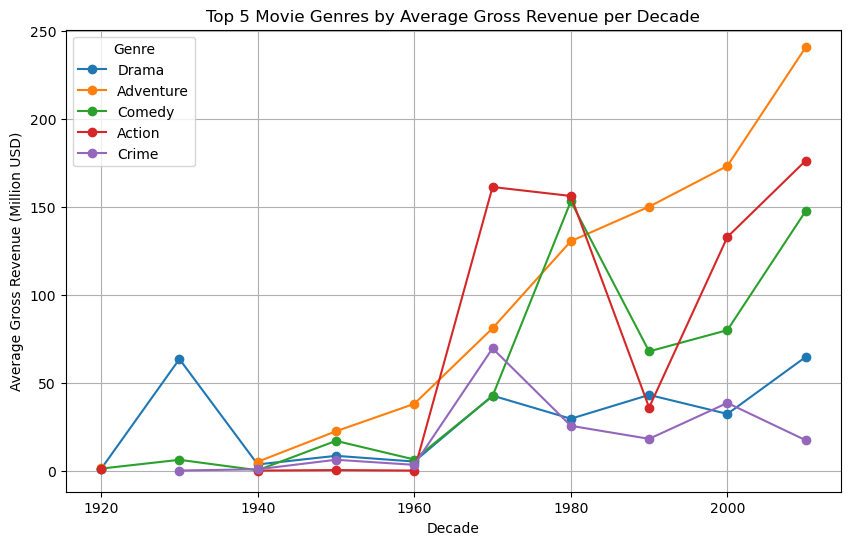

In [86]:
#확장 프로젝트 (3): 시기별(10년 단위) 장르별 흥행수익 분석

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\User\Documents\Project1\data\IMDB top 1000.csv")
df = df.dropna(subset=["Title", "Genre", "Rate"])
df["Rate"] = df["Rate"].astype(float)

df["Released_Year"] = df["Title"].str.extract(r"\((\d{4})\)").astype(int) 

df["Info"] = df["Info"].fillna("Votes:0|Gross:$0M")

df["Gross"] = df["Info"].str.split("|").str[1]
df["Gross"] = df["Gross"].str.replace("Gross:", "").str.replace("$", "").str.replace("M", "").str.strip()
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce").fillna(0)

df["Genre"] = df["Genre"].str.split(",")
df = df.explode("Genre")
df["Genre"] = df["Genre"].str.strip()

df["Decade"] = df["Released_Year"] // 10 * 10

valid_decades = df["Decade"].value_counts().loc[lambda x: x >= 20].index
df_filtered = df[df["Decade"].isin(valid_decades)]

genre_gross = df_filtered.groupby(["Decade", "Genre"])["Gross"].mean().reset_index()
pivot_gross = genre_gross.pivot(index="Decade", columns="Genre", values="Gross")

top_genres = df_filtered["Genre"].value_counts().head(5).index
pivot_gross_top = pivot_gross[top_genres]

pivot_gross_top.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Top 5 Movie Genres by Average Gross Revenue per Decade")
plt.ylabel("Average Gross Revenue (Million USD)")
plt.xlabel("Decade")
plt.ylim(None, pivot_gross_top.max().max() + 10)
plt.grid(True)

plt.show()     

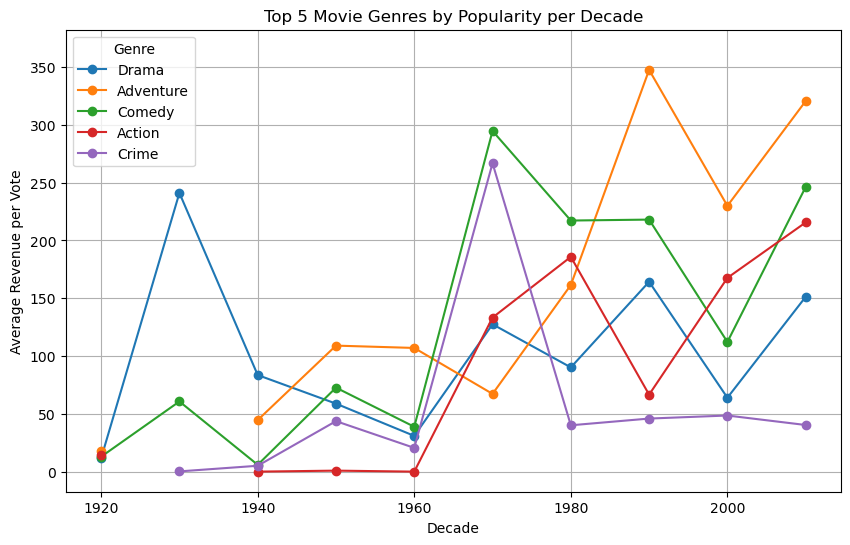

In [44]:
#확장 프로젝트 (4): 시기별(10년 단위) 장르별 흥행성 분석

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\User\Documents\Project1\data\IMDB top 1000.csv")
df = df.dropna(subset=["Title", "Genre", "Rate"])
df["Rate"] = df["Rate"].astype(float)

df["Released_Year"] = df["Title"].str.extract(r"\((\d{4})\)").astype(int) 

df["Info"] = df["Info"].fillna("Votes:0|Gross:$0M")

df["Votes"] = df["Info"].str.split("|").str[0]
df["Votes"] = df["Votes"].str.replace("Votes:", "").str.replace(",", "").str.strip().astype(float)

df["Gross"] = df["Info"].str.split("|").str[1]
df["Gross"] = df["Gross"].str.replace("Gross:", "").str.replace("$", "").str.replace("M", "").str.strip()
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce").fillna(0)

df["Popularity"] = (df["Gross"] * 1_000_000) / df["Votes"].replace(0, float("nan"))

df["Genre"] = df["Genre"].str.split(",")
df = df.explode("Genre")
df["Genre"] = df["Genre"].str.strip()

df["Decade"] = df["Released_Year"] // 10 * 10

valid_decades = df["Decade"].value_counts().loc[lambda x: x >= 20].index
df_filtered = df[df["Decade"].isin(valid_decades)]

genre_popularity = df_filtered.groupby(["Decade", "Genre"])["Popularity"].mean().reset_index()
pivot_popularity = genre_popularity.pivot(index="Decade", columns="Genre", values="Popularity")

top_genres = df_filtered["Genre"].value_counts().head(5).index
pivot_popularity_top = pivot_popularity[top_genres]

pivot_popularity_top.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Top 5 Movie Genres by Popularity per Decade")
plt.ylabel("Average Revenue per Vote")
plt.xlabel("Decade")
plt.ylim(None, pivot_popularity_top.max().max() * 1.1)
plt.grid(True)

plt.show()     

In [55]:
#확장 프로젝트 (4): 시기별(10년 단위) 장르별 흥행수익 기준 Top 10 영화
 
import pandas as pd

df = pd.read_csv(r"C:\Users\User\Documents\Project1\data\IMDB top 1000.csv")

df = df.dropna(subset=["Title", "Genre", "Rate"])
df["Rate"] = df["Rate"].astype(float)
df["Released_Year"] = df["Title"].str.extract(r"\((\d{4})\)").astype(int) 

df["Info"] = df["Info"].fillna("Votes:0|Gross:$0M")

df["Votes"] = df["Info"].str.split("|").str[0]
df["Votes"] = df["Votes"].str.replace("Votes:", "").str.replace(",", "").str.strip().astype(float)

df["Gross"] = df["Info"].str.split("|").str[1]
df["Gross"] = df["Gross"].str.replace("Gross:", "").str.replace("$", "").str.replace("M", "").str.strip()
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce").fillna(0)

df["Decade"] = df["Released_Year"] // 10 * 10

df = df.drop_duplicates(subset="Title")

valid_decades = df["Decade"].value_counts().loc[lambda x: x >= 20].index
df_filtered = df[df["Decade"].isin(valid_decades)]

top10_gross = df_filtered.groupby(["Decade"]).apply(lambda g: g.sort_values("Gross", ascending=False).head(10))
top10_rate = df_filtered.groupby(["Decade"]).apply(lambda g: g.sort_values("Rate", ascending=False).head(10))
top10_votes = df_filtered.groupby(["Decade"]).apply(lambda g: g.sort_values("Votes", ascending=False).head(10))
                                                               
print("시기별 흥행수익 Top 10")
print(top10_gross[["Title", "Released_Year", "Genre", "Gross"]])

print("시기별 평점 Top 10")
print(top10_rate[["Title", "Released_Year", "Genre", "Rate"]])

print("시기별 투표수 Top 10")
print(top10_votes[["Title", "Released_Year", "Genre", "Votes"]])


시기별 흥행수익 Top 10
                                                        Title  Released_Year  \
Decade                                                                         
1950   295                                298. Ben-Hur (1959)           1959   
       300           303. The Bridge on the River Kwai (1957)           1957   
       79                              80. Rear Window (1954)           1954   
       179                       180. Some Like It Hot (1959)           1959   
       118                     119. North by Northwest (1959)           1959   
...                                                       ...            ...   
2010   221  224. Harry Potter and the Deathly Hallows: Par...           2011   
       344                               347. Deadpool (2016)           2016   
       208                         211. Inside Out (I) (2015)           2015   
       328                               331. Zootopia (2016)           2016   
       32               

C:\Users\user\AppData\Local\Temp\ipykernel_4008\2583359877.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_gross = df_filtered.groupby(["Decade"]).apply(lambda g: g.sort_values("Gross", ascending=False).head(10))
C:\Users\user\AppData\Local\Temp\ipykernel_4008\2583359877.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_rate = df_filtered.groupby(["Decade"]).apply(lambda g: g.sort_values